 ## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [2]:
#cargar librerias estandar

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#librerias ciencias de datos

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#archivos y navaegador

import webbrowser
import os

#funciones

import math

In [3]:
#Leer el archivo CSV
file_path = 'C:/unad/analisis_de_datos/heart_cleveland_upload.csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: El archivo '{file_path}' no fue encontrado.")
    exit()
except Exception as e:
    print(f"Ocurrió un error al leer el archivo: {e}")
    exit()
df_sorted = df.sort_values(by='age', ascending=False)
html_table = df_sorted.to_html(index=False, classes='my_table', justify='center')

html_content = f"""
<!DOCTYPE html>
<html>
<head>
<title>Reporte Heart Cleveland</title>
<style>
  body {{ font-family: sans-serif; }}
  .my_table {{
    border-collapse: collapse;
    margin: 25px 0;
    font-size: 0.9em;
    min-width: 400px;
    box-shadow: 0 0 20px rgba(0, 0, 0, 0.15);
    border: 1px solid #dddddd;
  }}
  .my_table thead tr {{
    background-color: #009879;
    color: #ffffff;
    text-align: left;
  }}
  .my_table th,
  .my_table td {{
    padding: 12px 15px;
    text-align: center;
  }}
  .my_table tbody tr {{
    border-bottom: 1px solid #dddddd; 
  }}
  .my_table tbody tr:nth-of-type(even) {{
    background-color: #f3f3f3;
  }}
  .my_table tbody tr:last-of-type {{
    border-bottom: 2px solid #009879;
  }}
  .my_table tbody tr:hover {{
    background-color: #f1f1f1;
    cursor: pointer;
  }}
</style>
</head>
<body>

<h2>Reporte Ordenado por Edad</h2>
<p>Se genera un informe de personas desde {df['age'].min()} a {df['age'].max()} anios de edad. Se organizan de mayor a menor edad.</p>

{html_table}

</body>
</html>
"""

output_file = 'reporte_heart_cleveland.html'
try:
    with open(output_file, 'w', encoding='utf-8') as f:
        f.write(html_content)
    print(f"Tabla guardada como '{output_file}'")

    webbrowser.open('file://' + os.path.realpath(output_file))

except Exception as e:
    print(f"Ocurrió un error al guardar o abrir el archivo HTML: {e}")

Tabla guardada como 'reporte_heart_cleveland.html'


In [2]:
file_path = 'C:/unad/analisis_de_datos/heart_cleveland_upload.csv'
df = None

try:
    df = pd.read_csv(file_path)
    print(f"Archivo '{file_path}' Cargado en HTML correctamente.")
except FileNotFoundError:
    print(f"Error: El archivo '{file_path}' Error en el HTML.")
    exit()
except Exception as e:
    print(f"Ocurrio un error al leer el archivo en este bloque: {e}")
    exit()

# Calcular, formatear y guardar df.describe() como HTML
if df is not None:
    try:
        print("Calculando estadísticas descriptivas (df.describe())...")
        # Calcular las estadísticas descriptivas
        descriptive_stats_df = df.describe()
        
        html_stats_table = descriptive_stats_df.to_html(
            classes='my_table stats_table',     
            float_format='{:.2f}'.format, 
            border=1                                
        )
        html_stats_content = f"""
        <!DOCTYPE html>
        <html lang="es">
        <head>
        <meta charset="UTF-8">
        <title>Estadísticas Descriptivas - Heart Cleveland</title>
        <style>
          body {{ font-family: sans-serif; margin: 20px; background-color: #f9f9f9; }}
          h2 {{ color: #333; border-bottom: 2px solid #009879; padding-bottom: 5px;}}
          p {{ color: #555; }}
          .my_table {{
            border-collapse: collapse;
            margin: 25px auto;
            font-size: 0.9em;
            min-width: 600px; 
            max-width: 90%;
            box-shadow: 0 0 20px rgba(0, 0, 0, 0.1);
            background-color: #fff;
            border: 1px solid #ddd;
          }}
          .my_table thead tr {{
            background-color: #009879;
            color: #ffffff;
            text-align: center;
          }}
          .my_table th,
          .my_table td {{
            padding: 12px 15px;
            border: 1px solid #ddd;
          }}
          .my_table th {{ font-weight: bold; }}
          .my_table td:first-child, 
          .my_table th:first-child {{
            text-align: left;
            background-color: #f3f3f3; 
            font-weight: bold;
          }}
          .my_table tbody td {{ text-align: right; }}
          .my_table tbody td:first-child {{ text-align: left; }} 
          .my_table tbody tr:nth-of-type(even) {{
            background-color: #f8f8f8;
          }}
          .my_table tbody tr:hover {{
            background-color: #e8f4f2; 
          }}
        </style>
        </head>
        <body>

        <h2>Resumen Estadístico del Dataset</h2>
        <p>A continuación se muestran las estadísticas descriptivas principales para las columnas numéricas del conjunto de datos.</p>

        {html_stats_table}

        <p style="text-align:center; font-size:0.8em; color: #777;">Autor: Julian Lara:estadisticas_descriptiva,heart_cleveland_upload</p>

        </body>
        </html>
        """
        stats_output_file = 'estadisticas_descriptivas_describe.html'
        with open(stats_output_file, 'w', encoding='utf-8') as f:
            f.write(html_stats_content)

        try:
            webbrowser.open('file://' + os.path.realpath(stats_output_file))
        except Exception as e_web:
            print(f"No se pudo abrir el archivo automáticamente: {e_web}")

    except Exception as e_desc:
        print(f"Ocurrió un error al generar las estadísticas descriptivas: {e_desc}")
else:
    print("No se pueden generar estadísticas.")

Ocurrio un error al leer el archivo en este bloque: name 'pd' is not defined
No se pueden generar estadísticas.


El dataset tiene 297 filas y 14 columnas.

 Generando Box Plots para visualizar la distribución y outliers 
Columnas a graficar: age, trestbps, chol, thalach, oldpeak


C:\Users\jlara\AppData\Local\Temp\ipykernel_11560\1516502498.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], ax=axes[i], palette="viridis")
C:\Users\jlara\AppData\Local\Temp\ipykernel_11560\1516502498.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], ax=axes[i], palette="viridis")
C:\Users\jlara\AppData\Local\Temp\ipykernel_11560\1516502498.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], ax=axes[i], palette="viridis")
C:\Users\jlara\AppData\Local\Temp\ipykernel_11560\1516502498.py:38: FutureWarni

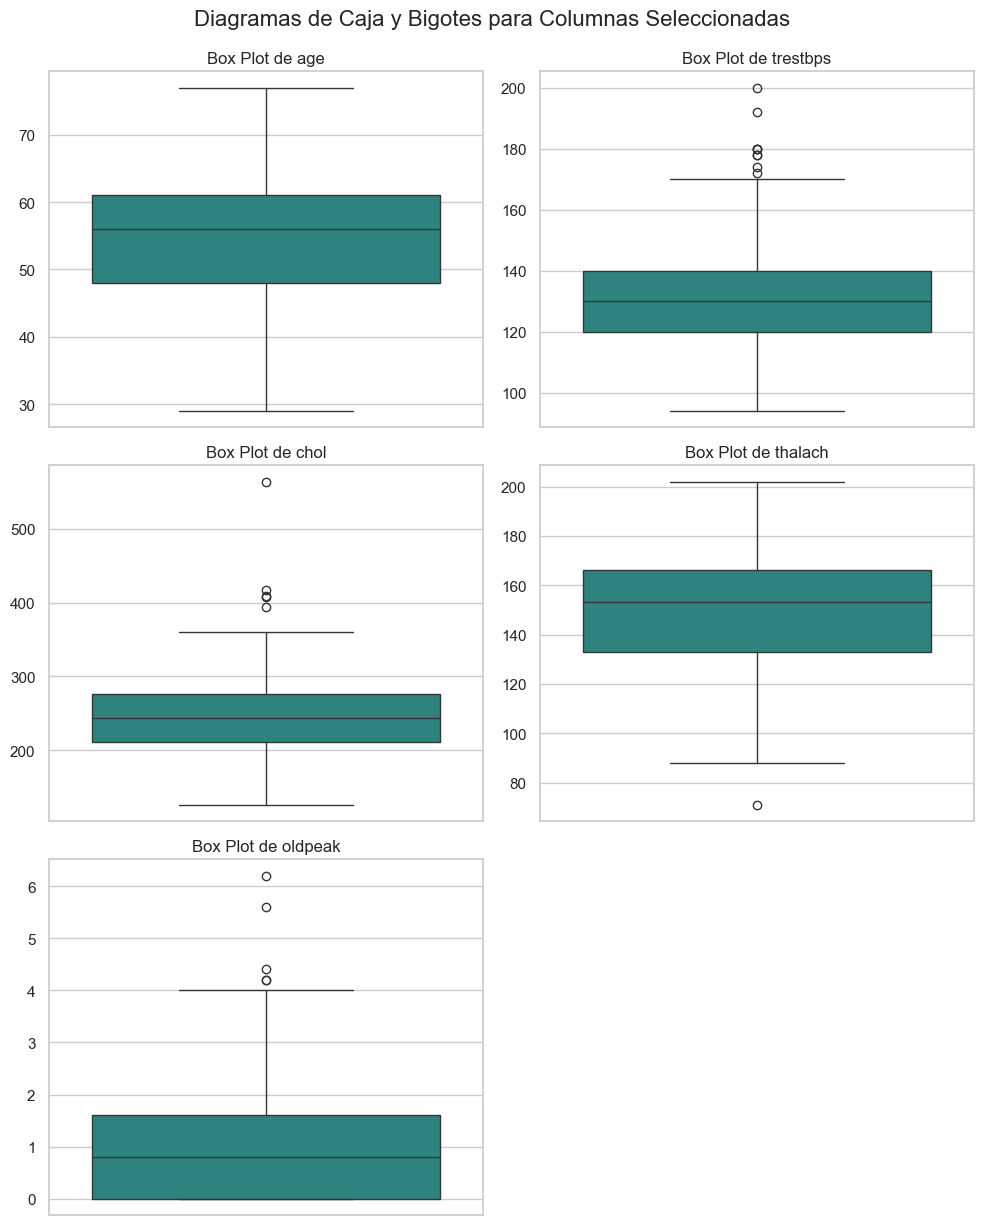


 Fin del analisis


In [31]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid")

#Leer el archivo CSV
file_path = 'C:/unad/analisis_de_datos/heart_cleveland_upload.csv'
try:
    df = pd.read_csv(file_path)
    print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")
except FileNotFoundError:
    print(f"Error: El archivo '{file_path}' no fue encontrado.")
    exit()
except Exception as e:
    print(f"Ocurrio un error al leer el archivo: {e}")
    exit()

# Visualización de Outliers
print("\n Generando Box Plots para visualizar la distribución y outliers ")

numeric_cols_for_outliers = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
print(f"Columnas a graficar: {', '.join(numeric_cols_for_outliers)}")

# Crear la figura y los subplots
num_cols = len(numeric_cols_for_outliers)
# calculo de filas y columnas de subplots
n_plot_cols = 2
n_plot_rows = math.ceil(num_cols / n_plot_cols)

# subplots
fig, axes = plt.subplots(n_plot_rows, n_plot_cols, figsize=(n_plot_cols * 5, n_plot_rows * 4)) # Ajusta figsize según necesidad

# iterar incluso si solo hay una fila/columna
axes = axes.flatten()

# Generar boxplots
for i, col in enumerate(numeric_cols_for_outliers):
    if pd.api.types.is_numeric_dtype(df[col]):
        sns.boxplot(y=df[col], ax=axes[i], palette="viridis")
        axes[i].set_title(f'Box Plot de {col}')     
        axes[i].set_ylabel('')                      
    else:
      
        axes[i].set_title(f'{col} (No Numérica)')
        axes[i].axis('off') 

for j in range(num_cols, len(axes)):
    axes[j].axis('off')

# Mostrar
plt.tight_layout() # Ajusta automáticamente el espaciado
plt.suptitle("Diagramas de Caja y Bigotes para Columnas Seleccionadas", y=1.02, fontsize=16)
plt.show()# Muestra la figura de los plots

print("\n Fin del analisis")

Archivo 'C:/unad/analisis_de_datos/heart_cleveland_upload.csv' cargado exitosamente.

Generando mapa de calor para visualizar valores nulos...


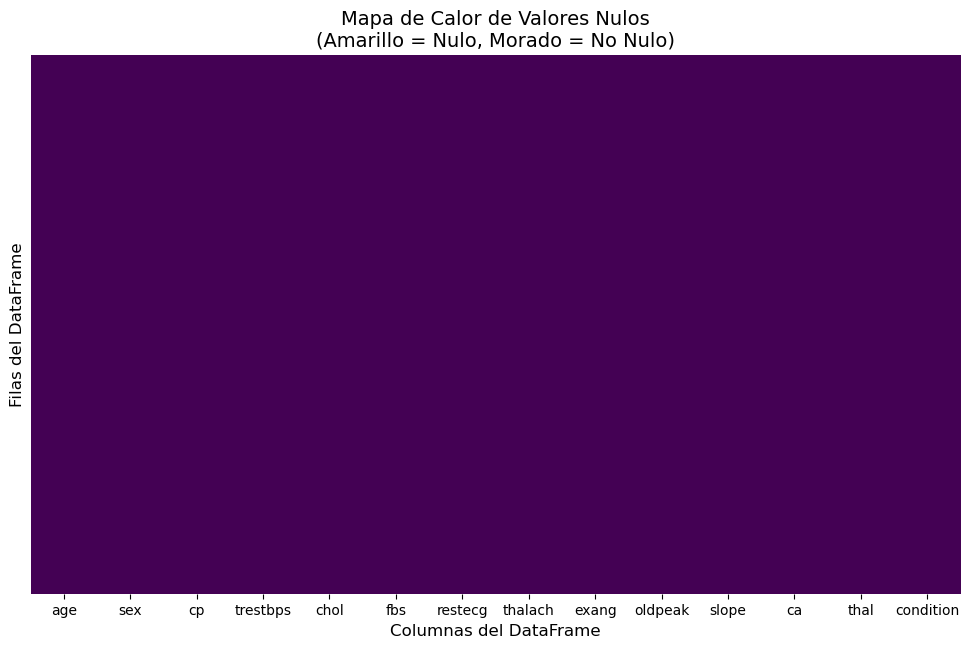


Visualmente no deberían aparecer valores nulos (celdas amarillas) en el mapa.


In [8]:

file_path = 'C:/unad/analisis_de_datos/heart_cleveland_upload.csv'
df = None
try:
    df = pd.read_csv(file_path)
    print(f"Archivo '{file_path}' cargado exitosamente.")
except FileNotFoundError:
    print(f"Error: El archivo '{file_path}' no fue encontrado.")
    exit()
except Exception as e:
    print(f"Ocurrió un error al leer el archivo: {e}")
    exit()

if df is not None:
    print("\nGenerando mapa de calor para visualizar valores nulos...")
    plt.figure(figsize=(12, 7)) # Puedes ajustar el tamaño

    sns.heatmap(df.isnull(),
                cbar=False,           
                cmap='viridis',       
                # cmap='binary'      
                yticklabels=False)    

    plt.title('Mapa de Calor de Valores Nulos\n(Amarillo = Nulo, Morado = No Nulo)', fontsize=14)
    plt.xlabel('Columnas del DataFrame', fontsize=12)
    plt.ylabel('Filas del DataFrame', fontsize=12)
    plt.show()

    if df.isnull().sum().sum() == 0:
        print("\nVisualmente no deberían aparecer valores nulos (celdas amarillas) en el mapa.")
    else:
        print("\nBusca las celdas amarillas en el mapa, indican la posición de los valores nulos.")

else:
    print("El DataFrame no se cargó, no se puede generar el mapa de calor.")

In [7]:


print("Iniciando Bloque: Mínimos y Máximos")

# Definir ruta y leer el archivo CSV
file_path = 'C:/unad/analisis_de_datos/heart_cleveland_upload.csv'
df = None

try:
    df = pd.read_csv(file_path)
    print(f"Archivo '{file_path}' cargado exitosamente.")
except FileNotFoundError:
    print(f"Error: El archivo '{file_path}' no fue encontrado.")
    exit()
except Exception as e:
    print(f"Ocurrió un error al leer el archivo: {e}")
    exit()

if df is not None:
    try:
        print("\nCalculando valores mínimos y máximos por columna...")
        # Calcular mínimos y máximos
        min_values = df.min(numeric_only=True) 
        max_values = df.max(numeric_only=True)


        min_max_summary = pd.DataFrame({
            'Valor Mínimo': min_values,
            'Valor Máximo': max_values
        })

        print("\nResumen de Valores Mínimos y Máximos (Columnas Numéricas):")
       
        print(min_max_summary.to_string())

    

    except Exception as e_minmax:
        print(f"Ocurrió un error al calcular mínimos/máximos: {e_minmax}")
else:
    print("El DataFrame no se cargó, no se pueden calcular mínimos/máximos.")

print("\n Fin del Bloque: Mínimos y Máximos por Columna")

Iniciando Bloque: Mínimos y Máximos
Archivo 'C:/unad/analisis_de_datos/heart_cleveland_upload.csv' cargado exitosamente.

Calculando valores mínimos y máximos por columna...

Resumen de Valores Mínimos y Máximos (Columnas Numéricas):
           Valor Mínimo  Valor Máximo
age                29.0          77.0
sex                 0.0           1.0
cp                  0.0           3.0
trestbps           94.0         200.0
chol              126.0         564.0
fbs                 0.0           1.0
restecg             0.0           2.0
thalach            71.0         202.0
exang               0.0           1.0
oldpeak             0.0           6.2
slope               0.0           2.0
ca                  0.0           3.0
thal                0.0           2.0
condition           0.0           1.0

 Fin del Bloque: Mínimos y Máximos por Columna


Archivo 'C:/unad/analisis_de_datos/heart_cleveland_upload.csv' cargado exitosamente.

Generando histogramas para: age, trestbps, chol, thalach, oldpeak


C:\Users\jlara\AppData\Local\Temp\ipykernel_11560\3868219569.py:34: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, kde=True, ax=axes_hist[i], palette="viridis") #generar curva
C:\Users\jlara\AppData\Local\Temp\ipykernel_11560\3868219569.py:34: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, kde=True, ax=axes_hist[i], palette="viridis") #generar curva
C:\Users\jlara\AppData\Local\Temp\ipykernel_11560\3868219569.py:34: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, kde=True, ax=axes_hist[i], palette="viridis") #generar curva
C:\Users\jlara\AppData\Local\Temp\ipykernel_11560\3868219569.py:34: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, kde=True, ax=axes_hist[i], palette="viridis") #generar curva
C:\Users\jlara\AppData\Local\Temp\ipykernel_11560\38

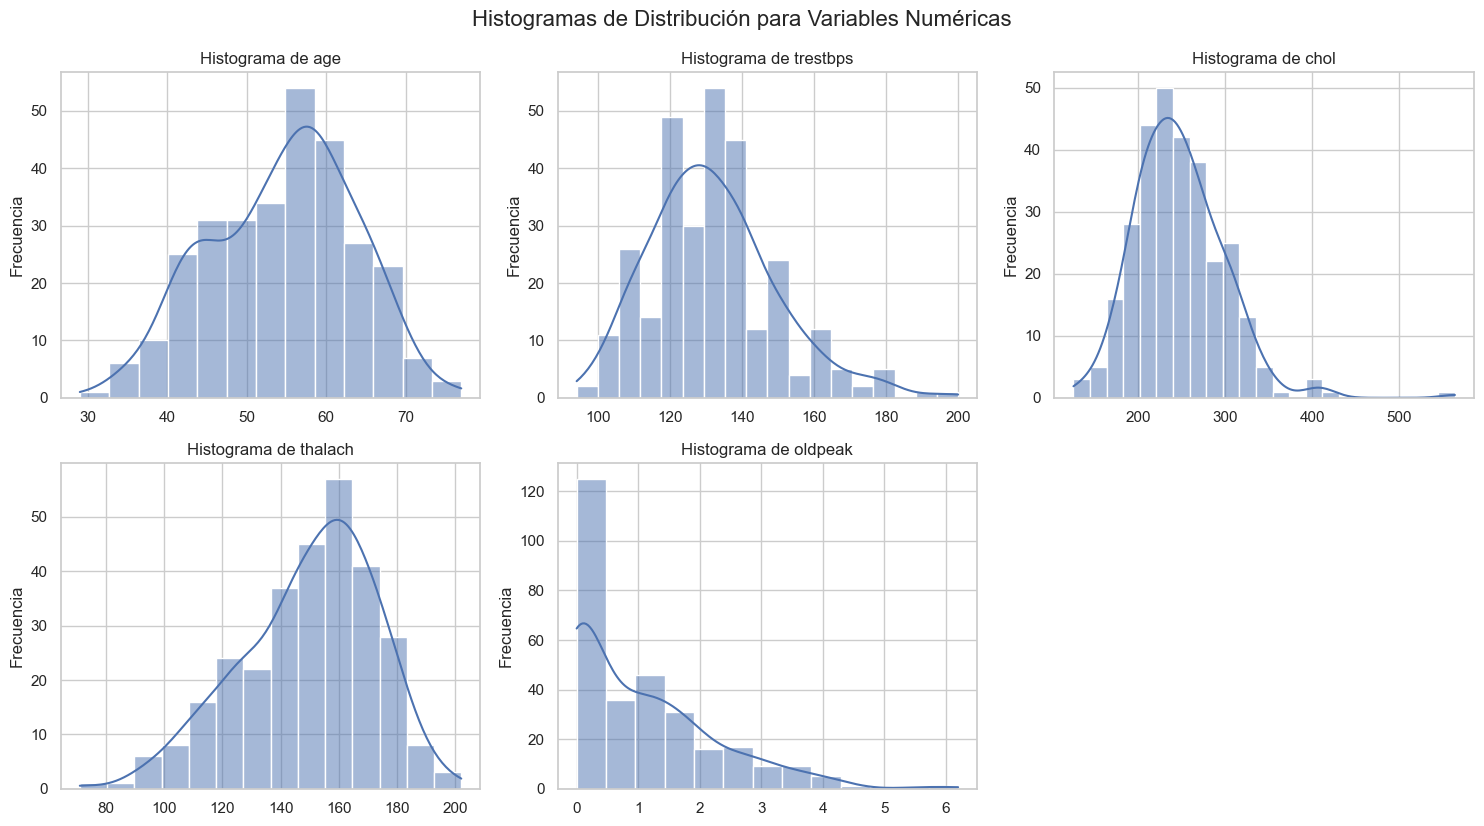

In [47]:
# --- Celda/Bloque para Generar Histogramas ---

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

file_path = 'C:/unad/analisis_de_datos/heart_cleveland_upload.csv'
df = None
try:
    df = pd.read_csv(file_path)
    print(f"Archivo '{file_path}' cargado exitosamente.")
except FileNotFoundError:
    print(f"Error: El archivo '{file_path}' no fue encontrado.")
    exit()
except Exception as e:
    print(f"Ocurrió un error al leer el archivo: {e}")
    exit()

# Histogramas 
if df is not None:
    numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

    print(f"\nGenerando histogramas para: {', '.join(numeric_cols)}")

    num_cols_hist = len(numeric_cols)
    n_plot_cols_hist = 3
    n_plot_rows_hist = math.ceil(num_cols_hist / n_plot_cols_hist)

    fig_hist, axes_hist = plt.subplots(n_plot_rows_hist, n_plot_cols_hist, figsize=(n_plot_cols_hist * 5, n_plot_rows_hist * 4))
    axes_hist = axes_hist.flatten()

    for i, col in enumerate(numeric_cols):
        sns.histplot(data=df, x=col, kde=True, ax=axes_hist[i], palette="viridis") #generar curva
        axes_hist[i].set_title(f'Histograma de {col}')
        axes_hist[i].set_xlabel('') #labels
        axes_hist[i].set_ylabel('Frecuencia')

    # Ocultar ejes no usados
    for j in range(num_cols_hist, len(axes_hist)):
        axes_hist[j].axis('off')

    plt.tight_layout()
    plt.suptitle("Histogramas de Distribución para Variables Numéricas", y=1.03, fontsize=16)
    plt.show()

else:
    print("El DataFrame no se cargó, no se pueden generar histogramas.")


Calculando matriz de correlación solo para: age, trestbps, chol, thalach, oldpeak


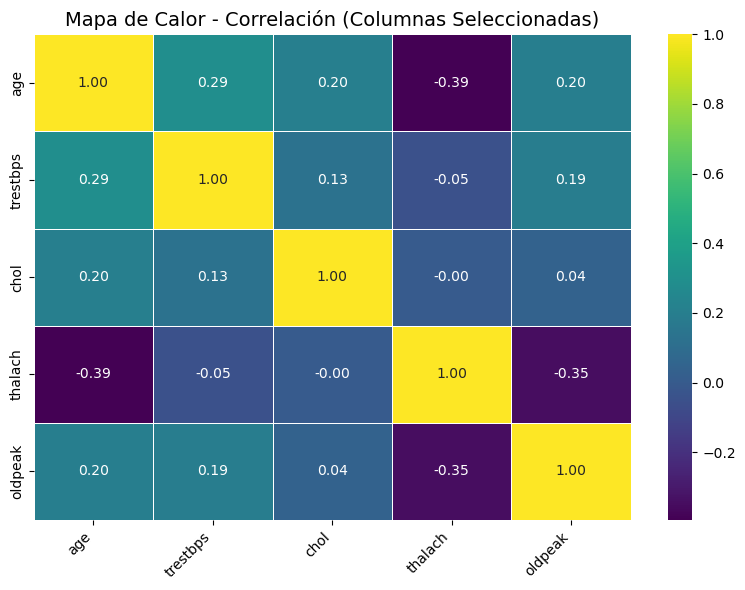

In [10]:

file_path = 'C:/unad/analisis_de_datos/heart_cleveland_upload.csv'
df = None
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: El archivo '{file_path}' no fue encontrado.")
    exit()
except Exception as e:
    print(f"Ocurrió un error al leer el archivo: {e}")
    exit()

# --- 2. Calcular y Mostrar Mapa de Calor para Columnas Específicas ---
if df is not None:
    # --- CAMBIO AQUÍ: Definir las columnas de interés ---
    selected_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
    print(f"\nCalculando matriz de correlación solo para: {', '.join(selected_cols)}")

    # Verificar si todas las columnas seleccionadas existen en el DataFrame
    missing_cols = [col for col in selected_cols if col not in df.columns]
    if missing_cols:
        print(f"Error: Las siguientes columnas seleccionadas no se encontraron en el DataFrame: {missing_cols}")
        exit()

    df_subset = df[selected_cols]

  
    correlation_matrix_subset = df_subset.corr()

    chosen_cmap = "viridis"

    plt.figure(figsize=(8, 6)) # Ajusta el tamaño (puede ser más pequeño con menos columnas)
    sns.heatmap(correlation_matrix_subset,
                annot=True,           # correlacion
                cmap=chosen_cmap,     # colores elegido
                fmt=".2f",            # Formato de numeros
                linewidths=.5)        

    plt.title(f'Mapa de Calor - Correlación (Columnas Seleccionadas)', fontsize=14)
    plt.xticks(rotation=45, ha='right') 
    plt.tight_layout()                  
    plt.show()                          

else:
    print("El DataFrame no se cargó, no se puede generar mapa de calor.")

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [12]:
#----------------------------------------------------------------------
#-------------------abrir archivo y validar---------------------------
file_path = 'C:/unad/analisis_de_datos/heart_cleveland_upload.csv'
df = None
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: El archivo '{file_path}' no fue encontrado.")
    exit()
except Exception as e:
    print(f"Ocurrió un error al leer el archivo: {e}")
    exit()
# ---------------------------------------------------------------------
# ---------------------------------------------------------------------

if df is not None:
    # Columnas en array
    cols_to_check_zeros = ['age', 'trestbps', 'chol', 'thalach']

    # Filtrar por si no estan
    actual_cols_to_check = [col for col in cols_to_check_zeros if col in df.columns]

    if actual_cols_to_check: 
      print("\n  Contando registros con valor 0 ")
      is_zero_df = (df[actual_cols_to_check] == 0)
      zero_counts = is_zero_df.sum()
        
      print("Conteo de ceros por columna:")
        
      print(zero_counts)
    else:
        print("Ninguna de las columnas especificadas para chequear ceros fue encontrada.")


else:
    print("DataFrame no cargado, no se puede realizar el conteo.")

    #print("NO se encontraron datos no es necesario realizar o remplazarlos.")



  Contando registros con valor 0 
Conteo de ceros por columna:
age         0
trestbps    0
chol        0
thalach     0
dtype: int64


In [14]:

#-------------------------------------------------------------------------------------------
print("Identificación de Filas con Valores Atípicos (IQR)")
#------------------------------------------------------------------------------------------

file_path = 'C:/unad/analisis_de_datos/heart_cleveland_upload.csv'
df = None
try:
    df = pd.read_csv(file_path)

except FileNotFoundError:
    print(f"Error: El archivo '{file_path}' no fue encontrado.")
    exit()
except Exception as e:
    print(f"Ocurrió un error al leer el archivo: {e}")
    exit()
# --------------------

if df is not None:

    numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
    print(f"\nIdentificando filas con valores atípicos (método IQR) en columnas: {', '.join(numerical_cols)}")
    all_outlier_indices = pd.Index([])

    for columna in numerical_cols:
        
        if columna in df.columns and pd.api.types.is_numeric_dtype(df[columna]):
            # Calcular
            Q1 = df[columna].quantile(0.25)
            Q3 = df[columna].quantile(0.75)
            IQR = Q3 - Q1
            limite_inferior = Q1 - 1.5 * IQR
            limite_superior = Q3 + 1.5 * IQR

            outliers_df_col = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]

            
            if not outliers_df_col.empty:
                print(f"\n  Filas con valores atípicos en '{columna}' ")
             
                print(f"(Valores fuera del rango: {limite_inferior:.2f} - {limite_superior:.2f})")
               
                print(f"Se encontraron {len(outliers_df_col)} filas:")
            
                print(outliers_df_col)

                all_outlier_indices = all_outlier_indices.union(outliers_df_col.index)
         
      
        else:
            print(f"\nAdvertencia: La columna '{columna}' no es numérica o no se encontró.")
       

    print("\n" + "="*60)
    if not all_outlier_indices.empty:
        print(f"Resumen: Se encontraron en total {len(all_outlier_indices)} filas que contienen al menos un valor atípico")
      
        print(f"en alguna de las columnas analizadas ({', '.join(numerical_cols)}).")
      
        print(f"Índices de estas filas: {all_outlier_indices.tolist()}")
       

    else:
        print(f"Resumen: No se encontraron filas con valores atípicos en las columnas analizadas ({', '.join(numerical_cols)}) usando el método IQR.")
    print("="*60)

else:
    print("DataFrame no cargado.")


Identificación de Filas con Valores Atípicos (IQR)

Identificando filas con valores atípicos (método IQR) en columnas: age, trestbps, chol, thalach, oldpeak

  Filas con valores atípicos en 'trestbps' 
(Valores fuera del rango: 90.00 - 170.00)
Se encontraron 9 filas:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
9     59    1   0       178   270    0        2      145      0      4.2   
45    54    1   1       192   283    0        2      195      0      0.0   
76    68    1   2       180   274    1        2      150      1      1.6   
117   52    1   2       172   199    1        0      162      0      0.5   
167   66    0   3       178   228    1        0      165      1      1.0   
178   64    0   3       180   325    0        0      154      1      0.0   
209   59    0   3       174   249    0        0      143      1      0.0   
234   56    0   3       200   288    1        2      133      1      4.0   
242   55    0   3       180   327    0        1 